In [1]:
# Download the dataset
!kaggle datasets download -d buraktaci/mri-stroke


Dataset URL: https://www.kaggle.com/datasets/buraktaci/mri-stroke
License(s): unknown
 92% 141M/154M [00:01<00:00, 108MB/s]
100% 154M/154M [00:01<00:00, 110MB/s]


In [2]:
!unzip mri-stroke.zip

Archive:  mri-stroke.zip
  inflating: Acute Ischemic Stroke-Control/Acute Ischemic Stroke/1.JPG  
  inflating: Acute Ischemic Stroke-Control/Acute Ischemic Stroke/10.JPG  
  inflating: Acute Ischemic Stroke-Control/Acute Ischemic Stroke/100.JPG  
  inflating: Acute Ischemic Stroke-Control/Acute Ischemic Stroke/1000.png  
  inflating: Acute Ischemic Stroke-Control/Acute Ischemic Stroke/1001.png  
  inflating: Acute Ischemic Stroke-Control/Acute Ischemic Stroke/1002.png  
  inflating: Acute Ischemic Stroke-Control/Acute Ischemic Stroke/1003.png  
  inflating: Acute Ischemic Stroke-Control/Acute Ischemic Stroke/1004.png  
  inflating: Acute Ischemic Stroke-Control/Acute Ischemic Stroke/101.JPG  
  inflating: Acute Ischemic Stroke-Control/Acute Ischemic Stroke/102.JPG  
  inflating: Acute Ischemic Stroke-Control/Acute Ischemic Stroke/103.JPG  
  inflating: Acute Ischemic Stroke-Control/Acute Ischemic Stroke/104.JPG  
  inflating: Acute Ischemic Stroke-Control/Acute Ischemic Stroke/105.JPG 

In [3]:
Stroke = "/content/Acute Ischemic Stroke-Control/Acute Ischemic Stroke"
healthy = "/content/Acute Ischemic Stroke-Control/Control"

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Directories for stroke and healthy images
stroke_dir = "/content/Acute Ischemic Stroke-Control/Acute Ischemic Stroke"
healthy_dir = "/content/Acute Ischemic Stroke-Control/Control"

# Image parameters
img_size = (224, 224)
batch_size = 32

In [5]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    directory="/content/Acute Ischemic Stroke-Control",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Use 'categorical' for multi-class
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    directory="/content/Acute Ischemic Stroke-Control",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Use 'categorical' for multi-class
    subset='validation'
)

Found 1609 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [6]:
# Load VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)  # Use 'softmax' for multi-class

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Define the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
    metrics=['accuracy']
)

In [9]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.6249 - loss: 0.6452

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 823ms/step - accuracy: 0.6253 - loss: 0.6449 - val_accuracy: 0.5833 - val_loss: 0.6764
Epoch 2/50
 1/50 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.6875 - loss: 0.5952

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 264ms/step - accuracy: 0.6875 - loss: 0.5952 - val_accuracy: 0.6471 - val_loss: 0.6316
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 632ms/step - accuracy: 0.6656 - loss: 0.6079 - val_accuracy: 0.6068 - val_loss: 0.6818
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5625 - loss: 0.7476 - val_accuracy: 0.5294 - val_loss: 0.6905
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 652ms/step - accuracy: 0.6862 - loss: 0.6041 - val_accuracy: 0.6042 - val_loss: 0.6755
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5938 - loss: 0.6895 - val_accuracy: 0.5294 - val_loss: 0.7349
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 655ms/step - accuracy: 0.6561 - loss: 0.6060 - val_accuracy: 0.6042 - val_loss: 0.6834
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6181 - val_accuracy: 0.6471 - val_loss: 0.6853
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 668ms/step - accuracy: 0.6852 - loss: 0.5916 - val_accuracy: 0.5964 - val_

In [10]:
model.save('stroke_model.h5')

Found 2010 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 504ms/step - accuracy: 0.6607 - loss: 0.5525
Test Loss: 0.49195635318756104
Test Accuracy: 0.7706467509269714
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step

Classification Report:
                       precision    recall  f1-score   support

Acute Ischemic Stroke       0.83      0.68      0.75      1002
              Control       0.73      0.86      0.79      1008

             accuracy                           0.77      2010
            macro avg       0.78      0.77      0.77      2010
         weighted avg       0.78      0.77      0.77      2010



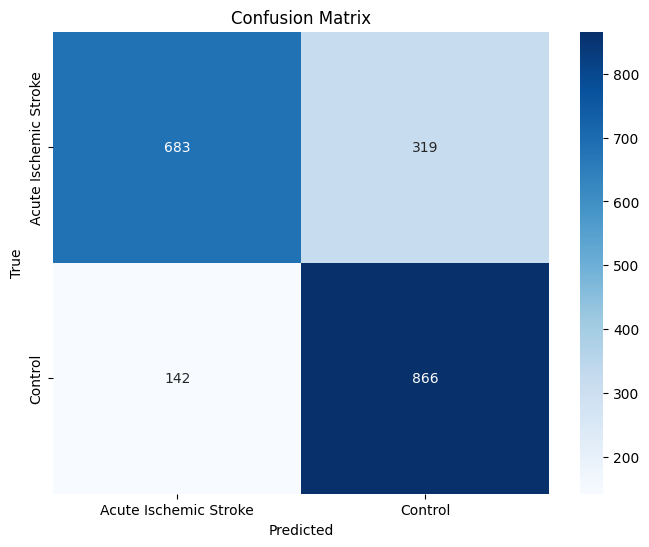

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory="/content/Acute Ischemic Stroke-Control",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Use 'categorical' for multi-class
    shuffle=False  # Important to not shuffle for proper evaluation
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict on the test data
test_predictions = model.predict(test_generator)
test_pred_classes = np.where(test_predictions > 0.5, 1, 0)  # Threshold for binary classification

# Classification report
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(true_classes, test_pred_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, test_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(model, img_path, target_size=(224, 224), class_labels=None):
    """
    Predict the class of a custom image using the trained model.

    Parameters:
        model: Trained Keras model
        img_path: Path to the image file
        target_size: Tuple specifying the target image size (default: (224, 224))
        class_labels: List of class labels (default: None, inferred from model if binary)

    Returns:
        Prediction result as a string.
    """
    # Load the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Scale pixel values

    # Predict using the model
    prediction = model.predict(img_array)

    # Interpret the prediction
    if class_labels is None:  # Binary classification
        predicted_label = "Stroke" if prediction[0][0] > 0.5 else "Healthy"
        confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]
    else:  # Multi-class classification
        predicted_class = np.argmax(prediction, axis=1)[0]
        predicted_label = class_labels[predicted_class]
        confidence = prediction[0][predicted_class]

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_label} ({confidence:.2f})")
    plt.show()

    return f"Prediction: {predicted_label}, Confidence: {confidence:.2f}"


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


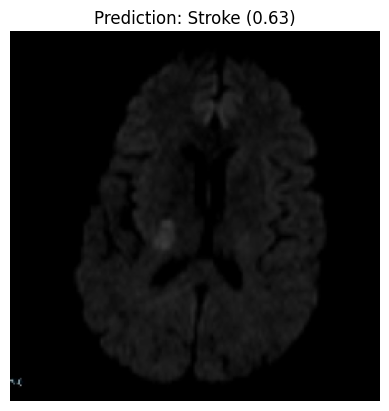

Prediction: Stroke, Confidence: 0.63


In [13]:
result = predict_image(
    model=model,
    img_path="/content/Acute Ischemic Stroke-Control/Acute Ischemic Stroke/1.JPG"
)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


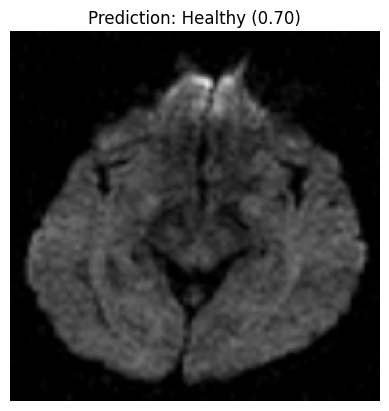

Prediction: Healthy, Confidence: 0.70


In [16]:
result = predict_image(
    model=model,
    img_path="/content/Acute Ischemic Stroke-Control/Control/122.JPG"
)
print(result)